In [1]:
import numpy as np
%matplotlib notebook

In [2]:
m = np.fromfile('maphaha.bin')

In [3]:
m.shape

(3457664,)

In [28]:
from configparser import ConfigParser
config = ConfigParser()

In [30]:
gs  = (119, 128, 227)

In [31]:
x_grid = np.linspace(0, 267.777061, 119)
y_grid = np.linspace(0, 289.284455, 128)
z_grid = np.linspace(0, 465.999861, 227)

In [32]:
m_grid = m.reshape(gs)

In [33]:
m_grid.shape

(119, 128, 227)

In [94]:
x_data, y_data, z_data, ivar, flux = np.load('pixel_datahaha.npy').T

In [98]:
np.unique(ivar)

array([0.1])

In [66]:
import matplotlib.pyplot as plt

In [87]:
z_slice = z_grid[100]
print(z_slice)

206.19462876106195


In [88]:
z_data.max()

1165.0498469214522

In [89]:
z_data.min()

5.0

In [92]:
ixs = np.where((z_data > z_slice - 2) & (z_data < z_slice + 2))[0]
x_plot, y_plot = x_data[ixs], y_data[ixs]

<IPython.core.display.Javascript object>


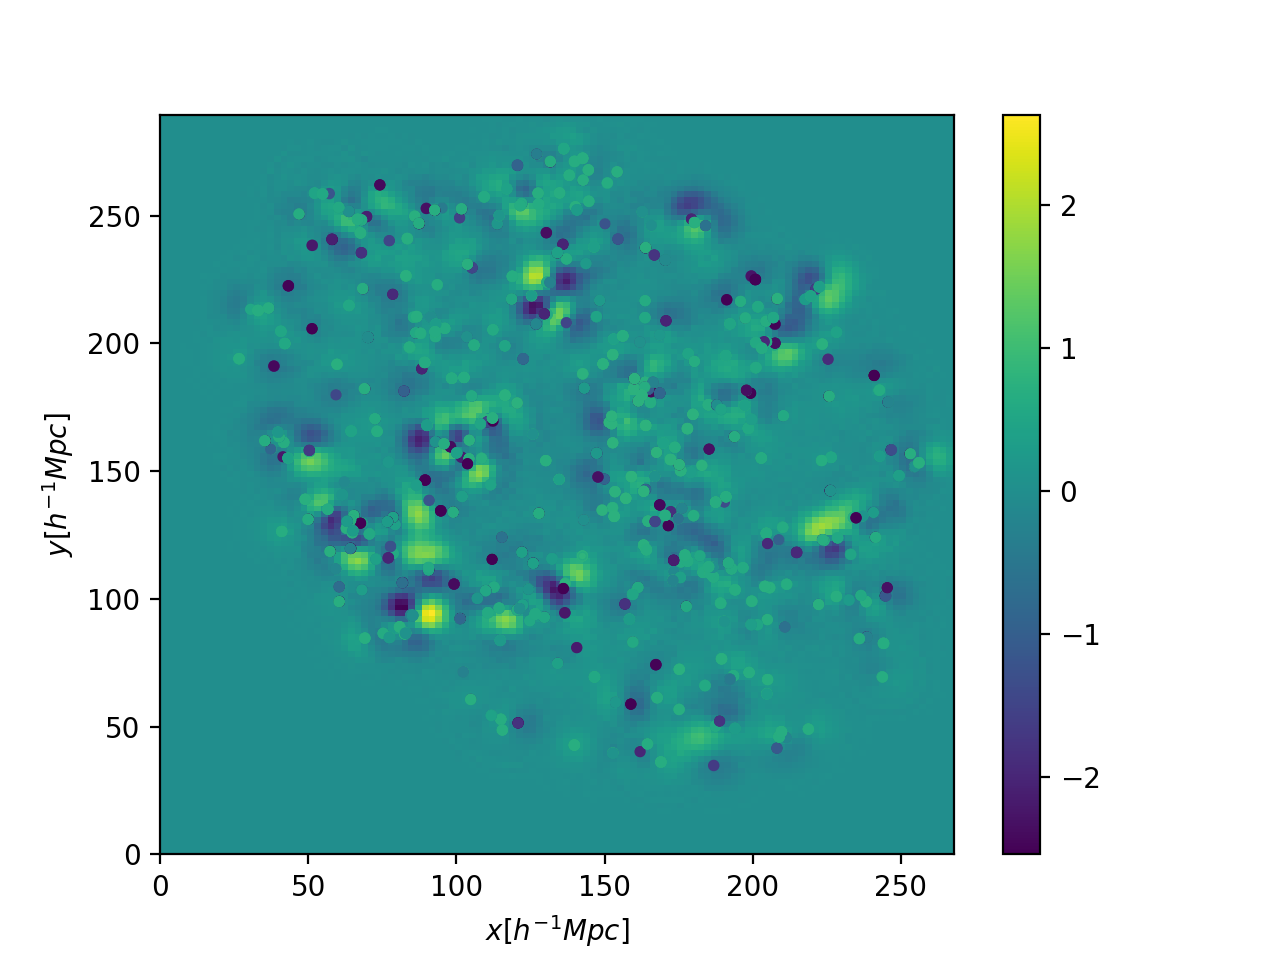

In [96]:
plt.pcolormesh(x_grid, y_grid, m_grid[:, :, 100].T)
plt.colorbar()


plt.scatter(x_plot, y_plot, c=flux[ixs], s=5* np.abs(z_data[ixs] - z_slice))
plt.clim(-1., 1.)

plt.xlabel(r"$x [h^{-1} Mpc]$")
plt.ylabel(r"$y [h^{-1} Mpc]$")

plt.savefig("reconstructed_signal.pdf")
plt.show()

<IPython.core.display.Javascript object>


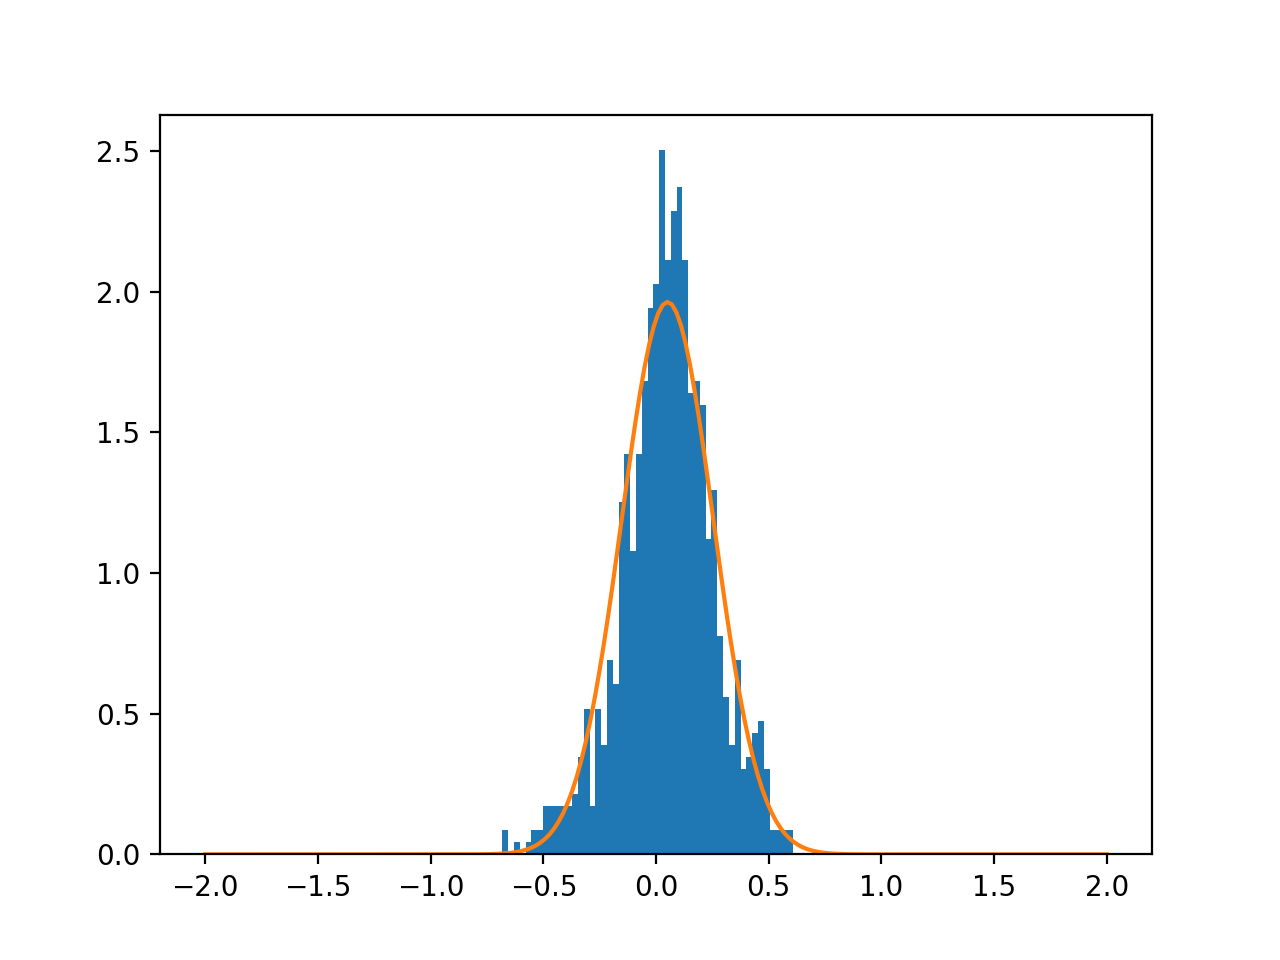

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [23]:
data = np.ravel(m_grid[45:75, 45:75, 50])
plt.hist(data, bins=50, normed=True)

x = np.linspace(-2, 2, 200)
from scipy.stats import norm
plt.plot(x, norm.pdf(x, data.mean(), data.std()))

In [10]:
m_grid[:, :, 50].mean()

0.0033457596443588747